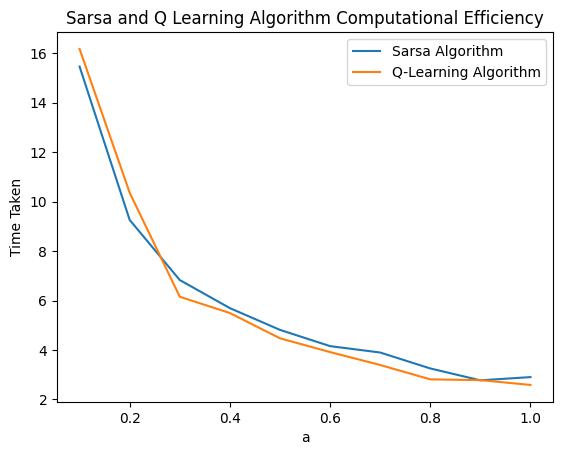

In [62]:
"""This uses Taxi-v3 environment from OpenAI gym and runs SARSA and Q Learning algorithm on it for various values of alpha while keeping gamma constant and records episodes generated and time taken."""

import random
import numpy as np
import time
import matplotlib.pyplot as plt
import gym

# Connecting to OpenAI
env = gym.make('Taxi-v3')


def sarsa(alpha, gamma): 
    # Initializing Q arbitarrialy.
    for i in range(env.observation_space.n):
        for j in range(env.action_space.n):
            Q[i, j] = round(random.random(),1)
    
    episodes = 0

    # Running algorithm till convergence.
    while True:
        count = 0

        # Initializing s.
        
        s = env.reset()[0]
        
        # Taking actiona, observing r and s'.
        a = np.argmax(Q[s])
        tuple = env.step(a)
        next_s = tuple[0]
        R = tuple[1]
        done = tuple[2]
        # Saving old polciy to check for convergence.
        old_Q = np.zeros_like(Q)
        for i in range(env.observation_space.n):
            for j in range(env.action_space.n):
                old_Q[i, j] = Q[i,j]

        # Repeating episodes until s is terminal or MAX_STEPS are reached.
        while not done and count < 20:
            # print(Q)
            
            next_a = np.argmax(Q[next_s])# Greedy choice of next action.

            #Updating Q. Removing assignment part since that can cause values of the policy to become significantly large.
            Q[s, a] += Q[s,a] + alpha * (R + gamma * Q[next_s, next_a] - Q[s, a])

            # Setting next state and action to current.
            s = next_s
            a = next_a

            # Taking action a, observing r and s'
            tuple = env.step(a)
            next_s = tuple[0]
            R = tuple[1]
            done = tuple[2]
            count += 1
        
        episodes += 1

        convergence = True
        for s in range(env.observation_space.n):
            if np.sum(np.abs(Q[s]-old_Q[s])) > 1e-2:
                convergence = False

        if convergence:
            return episodes        
        
def q_learning(alpha, gamma):
    # Initializing Q arbitarrialy.
    for i in range(env.observation_space.n):
        for j in range(env.action_space.n):
            Q[i, j] = round(random.random(),1)

    episodes = 0
    # Running algorithm till convergence.
    while True:
        count = 0
        # Initializing s.
        s = env.reset()[0]

        # Taking actiona, observing r and s'.
        a = np.argmax(Q[s])
        tuple = env.step(a)
        next_s = tuple[0]
        R = tuple[1]
        done = tuple[2]
        # Saving old polciy to check for convergence.
        old_Q = np.zeros_like(Q)
        for i in range(env.observation_space.n):
            for j in range(env.action_space.n):
                old_Q[i, j] = Q[i,j]

        # Repeating episodes until s is terminal or MAX_STEPS are reached.
        while not done and count < 20:
            
            #Updating Q. Removing assignment part since that can cause values of the policy to become significantly large.
            Q[s, a] += Q[s,a] + alpha * (R + gamma * np.max(Q[next_s]) - Q[s, a])
            # Setting next state to current
            s = next_s

            # Taking actiona, observing r and s'.
            a = np.argmax(Q[s])
            tuple = env.step(a)
            next_s = tuple[0]
            R = tuple[1]
            done = tuple[2]
            count += 1
        
        episodes += 1
        
        convergence = True
        for s in range(env.observation_space.n):
            if np.sum(np.abs(Q[s]-old_Q[s])) > 1e-2:
                convergence = False
        
        if convergence:
            return episodes                

alphas = []
gamma = 0.5
sarsa_times = []
q_learning_times = []
sarsa_episodes = []
q_learning_episodes = []

alpha = 0.1

while alpha < 1.0:
    alphas.append(alpha)
    # Initializing Q arbitarrialy.
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    # Running Sarsa
    start_time = time.time()
    n = sarsa(alpha, gamma)
    sarsa_times.append(time.time()-start_time)
    sarsa_episodes.append(n)

    # Running Q Learning
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    start_time = time.time()
    n = q_learning(alpha, gamma)
    q_learning_times.append(time.time()-start_time)
    q_learning_episodes.append(n)
    
    alpha += 0.1

# print(sarsa_times)
# print(q_learning_times)
# plt.title("Sarsa and Q Learning Algorithm Computational Efficiency")
# plt.xlabel("a")
# plt.ylabel("Episodes(Iterations)")
# plt.plot(alphas, sarsa_episodes, label='Sarsa Algorithm')
# plt.plot(alphas, q_learning_episodes, label='Q-Learning Algorithm')
# plt.legend()
# plt.savefig("plot.png")

plt.title("Sarsa and Q Learning Algorithm Computational Efficiency")
plt.xlabel("a")
plt.ylabel("Time Taken")
plt.plot(alphas, sarsa_times, label='Sarsa Algorithm')
plt.plot(alphas, q_learning_times, label='Q-Learning Algorithm')
plt.legend()
plt.savefig("plot1.png")